In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

In [4]:
df = pd.read_pickle('DOGEALL_price_vader_LAST.pkl')

In [5]:
df

,unix,symbol,open,high,low,close,Volume DOGE,Volume USD,compound,pos,neu,neg,inf_compound,inf_pos,inf_neu,inf_neg
2022-05-01,1651363200,DOGE/USD,0.12737,0.13636,0.12698,0.13266,2.065414e+05,27399.78821,0.195508,0.113234,0.846936,0.039838,0.341321,0.170000,0.813714,0.016357
2022-04-30,1651276800,DOGE/USD,0.13501,0.13675,0.12500,0.12731,2.662943e+05,33901.92269,0.212694,0.113878,0.852900,0.033221,-0.082291,0.074000,0.837000,0.089000
2022-04-29,1651190400,DOGE/USD,0.13731,0.14449,0.13000,0.13487,4.037294e+05,54450.98914,0.227909,0.122642,0.845994,0.031367,0.252287,0.101226,0.877226,0.021548
2022-04-28,1651104000,DOGE/USD,0.13968,0.14356,0.13600,0.13729,2.449517e+05,33629.42306,0.198271,0.111571,0.853348,0.035078,0.290104,0.125565,0.851609,0.022826
2022-04-27,1651017600,DOGE/USD,0.13771,0.14556,0.13601,0.13946,4.427208e+05,61741.84406,0.152755,0.097579,0.859732,0.042696,0.155024,0.088455,0.882636,0.028970
2022-04-26,1650931200,DOGE/USD,0.15833,0.16640,0.13573,0.13783,1.230334e+06,169576.99690,0.179031,0.100582,0.865486,0.033933,0.166276,0.096719,0.875802,0.027479
2022-04-25,1650844800,DOGE/USD,0.13182,0.17073,0.12274,0.15854,2.584708e+06,409779.65030,0.215886,0.116162,0.857638,0.026200,0.209372,0.106010,0.872485,0.021505
2022-04-24,1650758400,DOGE/USD,0.13392,0.13501,0.13148,0.13180,8.202450e+04,10810.82956,0.209375,0.111081,0.859774,0.029148,0.091045,0.062364,0.904818,0.032818
2022-04-23,1650672000,DOGE/USD,0.13648,0.13648,0.13370,0.13370,1.464467e+05,19579.93025,0.179565,0.097754,0.875234,0.027009,0.266231,0.096077,0.885692,0.018231
2022-04-22,1650585600,DOGE/USD,0.13623,0.13800,0.13450,0.13648,2.568925e+05,35060.68184,0.174751,0.099736,0.864776,0.035490,0.283764,0.112071,0.874357,0.013571


In [6]:
# Remove obsolete vars

df = df.drop(columns = ['unix', 'symbol', 'Volume USD'])


In [7]:
# Main DF
df

,open,high,low,close,Volume DOGE,compound,pos,neu,neg,inf_compound,inf_pos,inf_neu,inf_neg
2022-05-01,0.12737,0.13636,0.12698,0.13266,2.065414e+05,0.195508,0.113234,0.846936,0.039838,0.341321,0.170000,0.813714,0.016357
2022-04-30,0.13501,0.13675,0.12500,0.12731,2.662943e+05,0.212694,0.113878,0.852900,0.033221,-0.082291,0.074000,0.837000,0.089000
2022-04-29,0.13731,0.14449,0.13000,0.13487,4.037294e+05,0.227909,0.122642,0.845994,0.031367,0.252287,0.101226,0.877226,0.021548
2022-04-28,0.13968,0.14356,0.13600,0.13729,2.449517e+05,0.198271,0.111571,0.853348,0.035078,0.290104,0.125565,0.851609,0.022826
2022-04-27,0.13771,0.14556,0.13601,0.13946,4.427208e+05,0.152755,0.097579,0.859732,0.042696,0.155024,0.088455,0.882636,0.028970
2022-04-26,0.15833,0.16640,0.13573,0.13783,1.230334e+06,0.179031,0.100582,0.865486,0.033933,0.166276,0.096719,0.875802,0.027479
2022-04-25,0.13182,0.17073,0.12274,0.15854,2.584708e+06,0.215886,0.116162,0.857638,0.026200,0.209372,0.106010,0.872485,0.021505
2022-04-24,0.13392,0.13501,0.13148,0.13180,8.202450e+04,0.209375,0.111081,0.859774,0.029148,0.091045,0.062364,0.904818,0.032818
2022-04-23,0.13648,0.13648,0.13370,0.13370,1.464467e+05,0.179565,0.097754,0.875234,0.027009,0.266231,0.096077,0.885692,0.018231
2022-04-22,0.13623,0.13800,0.13450,0.13648,2.568925e+05,0.174751,0.099736,0.864776,0.035490,0.283764,0.112071,0.874357,0.013571


In [8]:
#Feature Vectors

#1. All and ONLY price Data
#df = df.drop(columns = ['pos', 'neu', 'neg', 'inf_neg', 'inf_neu', 'inf_pos', 'inf_compound', 'compound' ])

# 2. ONLY MARKET DATA, but without high and low

#df = df.drop(columns = ['pos', 'neu', 'neg', 'inf_neg', 'inf_neu', 'inf_pos', 'inf_compound', 'high', 'low', 'compound'])

##### same results for both market, thus no need to incorporate high and low

#3. Open, close, volume market data & regular compound

#df = df.drop(columns = ['pos', 'neu', 'neg', 'inf_neg', 'inf_neu', 'inf_pos', 'inf_compound', 'high', 'low', 'inf_compound'])

#4. Open, close, volume market data & influencer compound

#df = df.drop(columns = ['pos', 'neu', 'neg', 'inf_neg', 'inf_neu', 'inf_pos', 'compound', 'high', 'low'])

#5. Open, close, volume market data Regular positive, negative and neutral scores

#df = df.drop(columns = [ 'inf_neg', 'inf_neu', 'inf_pos', 'compound', 'inf_compound', 'high', 'low'])

#6. open close volume market data influencer reg neu pos

df = df.drop(columns = ['pos', 'neu', 'neg',  'compound', 'inf_compound', 'high', 'low'])



In [9]:
df

,open,close,Volume DOGE,inf_pos,inf_neu,inf_neg
2022-05-01,0.12737,0.13266,2.065414e+05,0.170000,0.813714,0.016357
2022-04-30,0.13501,0.12731,2.662943e+05,0.074000,0.837000,0.089000
2022-04-29,0.13731,0.13487,4.037294e+05,0.101226,0.877226,0.021548
2022-04-28,0.13968,0.13729,2.449517e+05,0.125565,0.851609,0.022826
2022-04-27,0.13771,0.13946,4.427208e+05,0.088455,0.882636,0.028970
2022-04-26,0.15833,0.13783,1.230334e+06,0.096719,0.875802,0.027479
2022-04-25,0.13182,0.15854,2.584708e+06,0.106010,0.872485,0.021505
2022-04-24,0.13392,0.13180,8.202450e+04,0.062364,0.904818,0.032818
2022-04-23,0.13648,0.13370,1.464467e+05,0.096077,0.885692,0.018231
2022-04-22,0.13623,0.13648,2.568925e+05,0.112071,0.874357,0.013571


In [10]:
df=df.sort_index(ascending=True)

In [11]:
df

,open,close,Volume DOGE,inf_pos,inf_neu,inf_neg
2022-03-28,0.14466,0.14287,4.273001e+05,0.069955,0.921273,0.008773
2022-03-29,0.14277,0.14446,2.615197e+05,0.077625,0.916375,0.006000
2022-03-30,0.14439,0.14314,3.035784e+05,0.075846,0.853769,0.070385
2022-03-31,0.14297,0.13801,5.053691e+05,0.071188,0.895312,0.033563
2022-04-01,0.13818,0.14135,2.057565e+05,0.105600,0.864000,0.030400
2022-04-02,0.14119,0.13898,1.405384e+05,0.126333,0.869467,0.004133
2022-04-03,0.13905,0.14637,2.913681e+05,0.113727,0.867273,0.019000
2022-04-04,0.14654,0.14818,4.343124e+05,0.077500,0.911947,0.010553
2022-04-05,0.14804,0.17165,1.590604e+06,0.084514,0.895171,0.020286
2022-04-06,0.17161,0.14301,1.286192e+06,0.128250,0.853125,0.018667


In [12]:
#Scaling the data
scaler = MinMaxScaler()
scaler = scaler.fit(df)
dfsc = scaler.transform(df)

In [13]:
dfsc

array([[0.39082278, 0.35092467, 0.13796214, 0.07052365, 1.        ,
        0.09856997],
       [0.34810127, 0.38678394, 0.0717211 , 0.14178632, 0.95733651,
        0.06741573],
       [0.38471971, 0.35701398, 0.08852653, 0.12525988, 0.41198555,
        0.79083838],
       [0.35262206, 0.2413171 , 0.16915626, 0.08197846, 0.77386373,
        0.37710674],
       [0.24434901, 0.31664411, 0.04943973, 0.40168919, 0.50110449,
        0.34157303],
       [0.31238698, 0.2631935 , 0.02338045, 0.59431306, 0.54872393,
        0.04644195],
       [0.26401447, 0.42986017, 0.08364765, 0.47719595, 0.5296128 ,
        0.21348315],
       [0.43331826, 0.4706811 , 0.14076404, 0.140625  , 0.91876797,
        0.11856889],
       [0.46722423, 1.        , 0.60278464, 0.20579151, 0.77263488,
        0.22792937],
       [1.        , 0.35408209, 0.4811503 , 0.61211993, 0.40637373,
        0.20973783],
       [0.35872514, 0.42850699, 0.05682837, 0.29030593, 0.51949411,
        0.45318352],
       [0.42970163, 0

In [74]:

window_size = 1
X=[]
y=[]

for i in range(len(dfsc)-window_size):
    row = [r for r in dfsc[i:i+window_size]]
    X.append(row)
    label = dfsc[i+window_size][1]
    y.append(label)


X = np.array(X)
y = np.array(y)

In [75]:
print(X.shape)
print(y.shape)

(34, 1, 6)
(34,)


In [76]:
X

array([[[0.39082278, 0.35092467, 0.13796214, 0.07052365, 1.        ,
         0.09856997]],

       [[0.34810127, 0.38678394, 0.0717211 , 0.14178632, 0.95733651,
         0.06741573]],

       [[0.38471971, 0.35701398, 0.08852653, 0.12525988, 0.41198555,
         0.79083838]],

       [[0.35262206, 0.2413171 , 0.16915626, 0.08197846, 0.77386373,
         0.37710674]],

       [[0.24434901, 0.31664411, 0.04943973, 0.40168919, 0.50110449,
         0.34157303]],

       [[0.31238698, 0.2631935 , 0.02338045, 0.59431306, 0.54872393,
         0.04644195]],

       [[0.26401447, 0.42986017, 0.08364765, 0.47719595, 0.5296128 ,
         0.21348315]],

       [[0.43331826, 0.4706811 , 0.14076404, 0.140625  , 0.91876797,
         0.11856889]],

       [[0.46722423, 1.        , 0.60278464, 0.20579151, 0.77263488,
         0.22792937]],

       [[1.        , 0.35408209, 0.4811503 , 0.61211993, 0.40637373,
         0.20973783]],

       [[0.35872514, 0.42850699, 0.05682837, 0.29030593, 0.51949411,
 

In [77]:
y

array([0.38678394, 0.35701398, 0.2413171 , 0.31664411, 0.2631935 ,
       0.42986017, 0.4706811 , 1.        , 0.35408209, 0.42850699,
       0.34325665, 0.3804691 , 0.47248534, 0.16711773, 0.25890843,
       0.29634641, 0.38858818, 0.43888137, 0.37618403, 0.27131258,
       0.28980604, 0.34235453, 0.3060442 , 0.19733875, 0.20681101,
       0.14411367, 0.10126297, 0.70433018, 0.23725756, 0.27401894,
       0.22507894, 0.17050068, 0.        , 0.12065855])

In [78]:
# Train-test & validation split
X_train, y_train = X[:20], y[:20]
X_val, y_val = X[20:25], y[20:25]
X_test, y_test = X[25:], y[25:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((20, 1, 6), (20,), (5, 1, 6), (5,), (9, 1, 6), (9,))

In [96]:
model4 = Sequential()
model4.add(InputLayer((1, 6)))  # 3 time steps 7 vars
model4.add(LSTM(99))
#model4.add(Dense(16, 'relu'))
#model4.add(Dropout(0.1))
#model4.add(Dense(42, 'relu'))
model4.add(Dense(1, 'linear'))
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 99)                41976     
                                                                 
 dense_19 (Dense)            (None, 1)                 100       
                                                                 
Total params: 42,076
Trainable params: 42,076
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
2/2 [==============================] - 1s 250ms/step - loss: 0.1353 - root_mean_squared_error: 0.3679 - val_loss: 0.0415 - val_root_mean_squared_error: 0.2037
Epoch 2/300
2/2 [==============================] - 0s 16ms/step - loss: 0.1203 - root_mean_squared_error: 0.3468 - val_loss: 0.0336 - val_root_mean_squared_error: 0.1833
Epoch 3/300
2/2 [==============================] - 0s 16ms/step - loss: 0.1066 - root_mean_squared_error: 0.3265 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1626
Epoch 4/300
2/2 [==============================] - 0s 16ms/step - loss: 0.0937 - root_mean_squared_error: 0.3062 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1419
Epoch 5/300
2/2 [==============================] - 0s 16ms/step - loss: 0.0812 - root_mean_squared_error: 0.2850 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1216
Epoch 6/300
2/2 [==============================] - 0s 16ms/step - loss: 0.0712 - root_mean_squared_error: 0.2667 - val_loss: 0.0104 - val_root_mean_s

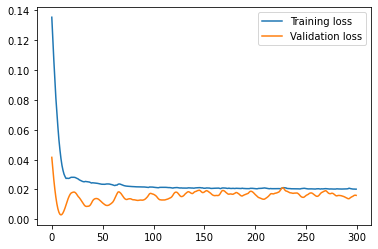

In [97]:
 #fit the model
history = model4.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_val,y_val), verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [98]:
# EVALUATE

model4.evaluate(X_test,y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.0428 - root_mean_squared_error: 0.2069


[0.04280100762844086, 0.20688404142856598]

In [99]:
model4.evaluate(X_val,y_val)

1/1 [==============================] - 0s 16ms/step - loss: 0.0160 - root_mean_squared_error: 0.1267


[0.016048938035964966, 0.12668439745903015]

In [100]:
# Training data predictions & plot
train_predictions = model4.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

1/1 [==============================] - 0s 221ms/step


,Train Predictions,Actuals
0,0.506878,0.386784
1,0.518045,0.357014
2,0.274403,0.241317
3,0.371449,0.316644
4,0.345283,0.263194
5,0.404041,0.429860
6,0.387190,0.470681
7,0.515323,1.000000
8,0.434347,0.354082
9,0.369344,0.428507


In [101]:
model4.evaluate(X_val,y_val)

1/1 [==============================] - 0s 16ms/step - loss: 0.0160 - root_mean_squared_error: 0.1267


[0.016048938035964966, 0.12668439745903015]

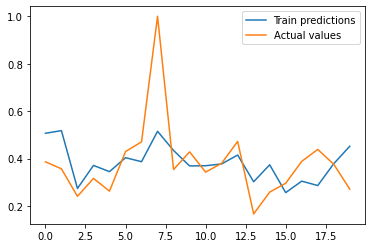

In [102]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'], label='Train predictions')
plt.plot(train_results['Actuals'], label='Actual values')
plt.legend()

In [103]:
#Validation data predictions & plot
val_predictions = model4.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

1/1 [==============================] - 0s 16ms/step


,Val Predictions,Actuals
0,0.290294,0.289806
1,0.237560,0.342355
2,0.425037,0.306044
3,0.350420,0.197339
4,0.384771,0.206811


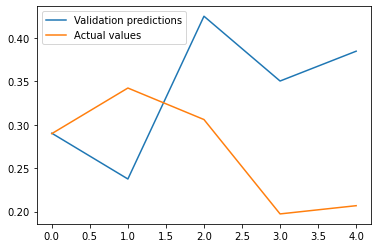

In [104]:
plt.plot(val_results['Val Predictions'], label='Validation predictions')
plt.plot(val_results['Actuals'], label='Actual values')
plt.legend()

In [105]:
# Test data predictions & plot
test_predictions = model4.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

1/1 [==============================] - 0s 16ms/step


,Test Predictions,Actuals
0,0.357812,0.144114
1,0.370470,0.101263
2,0.371704,0.704330
3,0.165557,0.237258
4,0.327410,0.274019
5,0.348404,0.225079
6,0.320012,0.170501
7,0.332972,0.000000
8,0.122725,0.120659


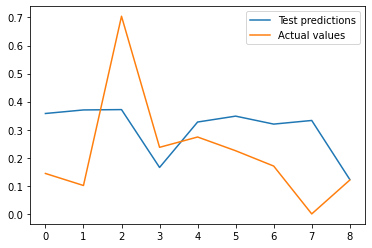

In [106]:
plt.plot(test_results['Test Predictions'], label='Test predictions')
plt.plot(test_results['Actuals'], label='Actual values')
plt.legend()

In [107]:
data = [train_results,val_results,test_results]
result = pd.concat(data)
data

[    Train Predictions   Actuals
 0            0.506878  0.386784
 1            0.518045  0.357014
 2            0.274403  0.241317
 3            0.371449  0.316644
 4            0.345283  0.263194
 5            0.404041  0.429860
 6            0.387190  0.470681
 7            0.515323  1.000000
 8            0.434347  0.354082
 9            0.369344  0.428507
 10           0.370145  0.343257
 11           0.377666  0.380469
 12           0.415283  0.472485
 13           0.302708  0.167118
 14           0.374166  0.258908
 15           0.256832  0.296346
 16           0.305214  0.388588
 17           0.286700  0.438881
 18           0.378746  0.376184
 19           0.452388  0.271313,
    Val Predictions   Actuals
 0         0.290294  0.289806
 1         0.237560  0.342355
 2         0.425037  0.306044
 3         0.350420  0.197339
 4         0.384771  0.206811,
    Test Predictions   Actuals
 0          0.357812  0.144114
 1          0.370470  0.101263
 2          0.371704  0.704330
 

In [108]:
dfres = pd.DataFrame( np.concatenate( (train_results.values, val_results.values, test_results.values), axis=0 ) )
dfres.columns = ['Prediction', 'Actual']
dfres

,Prediction,Actual
0,0.506878,0.386784
1,0.518045,0.357014
2,0.274403,0.241317
3,0.371449,0.316644
4,0.345283,0.263194
5,0.404041,0.429860
6,0.387190,0.470681
7,0.515323,1.000000
8,0.434347,0.354082
9,0.369344,0.428507


In [109]:
dfres['date'] = pd.date_range(start='2022-03-29', periods=len(dfres), freq='D')
dfres = dfres.set_index('date')
dfres

,Prediction,Actual
date,,
2022-03-29,0.506878,0.386784
2022-03-30,0.518045,0.357014
2022-03-31,0.274403,0.241317
2022-04-01,0.371449,0.316644
2022-04-02,0.345283,0.263194
2022-04-03,0.404041,0.429860
2022-04-04,0.387190,0.470681
2022-04-05,0.515323,1.000000
2022-04-06,0.434347,0.354082


C:\Users\dayan\AppData\Local\Temp/ipykernel_14332/178923220.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('DOGE_LSTM_market_infposnegneu.png', dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)
C:\Users\dayan\AppData\Local\Temp/ipykernel_14332/178923220.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('DOGE_LSTM_market_infposnegneu.png', dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)


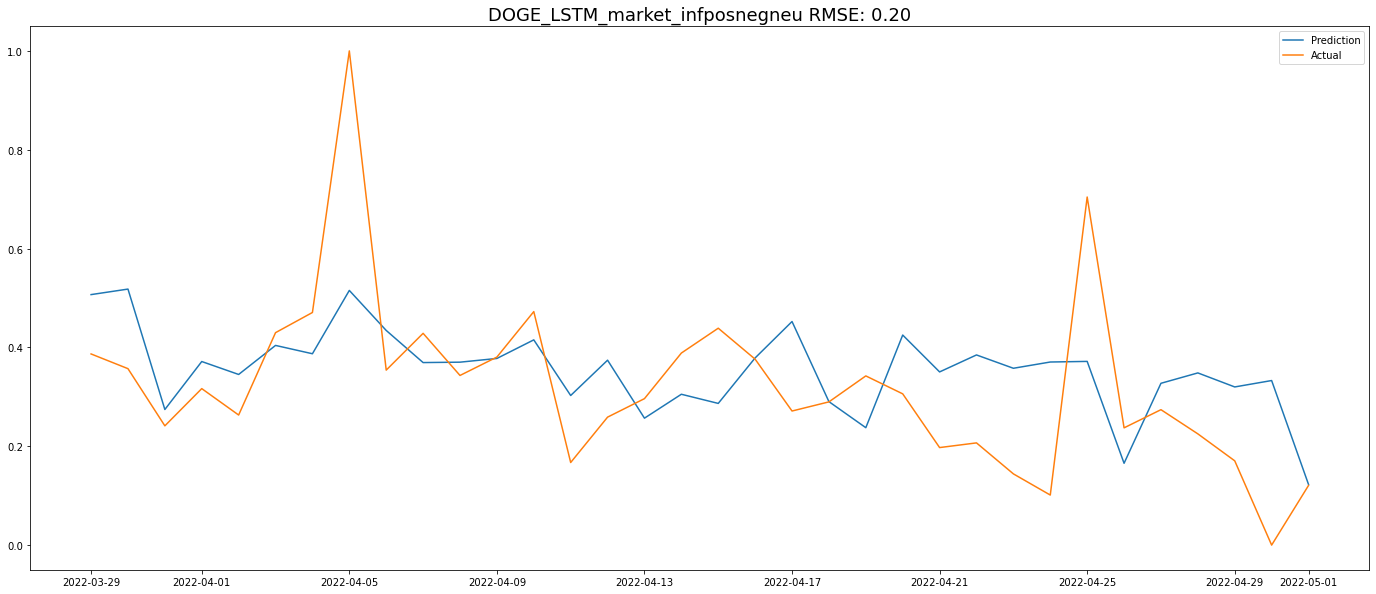

In [110]:
# Model plot

plt.rcParams['figure.figsize'] = 24,10
plt.plot(dfres['Prediction'], label = 'Prediction')
plt.plot(dfres['Actual'], label = 'Actual')
plt.title("DOGE_LSTM_market_infposnegneu RMSE: 0.20", fontdict=None, position= [0.50,1.05], fontsize = 18)
plt.legend()
plt.savefig('DOGE_LSTM_market_infposnegneu.png', dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)

In [111]:
from sklearn.metrics import mean_squared_error as mse
# Function to return df with predicted vs actual, mse & plot
def plot_predictions1(model, X, y, start=0, end=38):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

1/1 [==============================] - 0s 16ms/step


(   Predictions   Actuals
 0     0.290294  0.289806
 1     0.237560  0.342355
 2     0.425037  0.306044
 3     0.350420  0.197339
 4     0.384771  0.206811,
 0.01604893734891382)

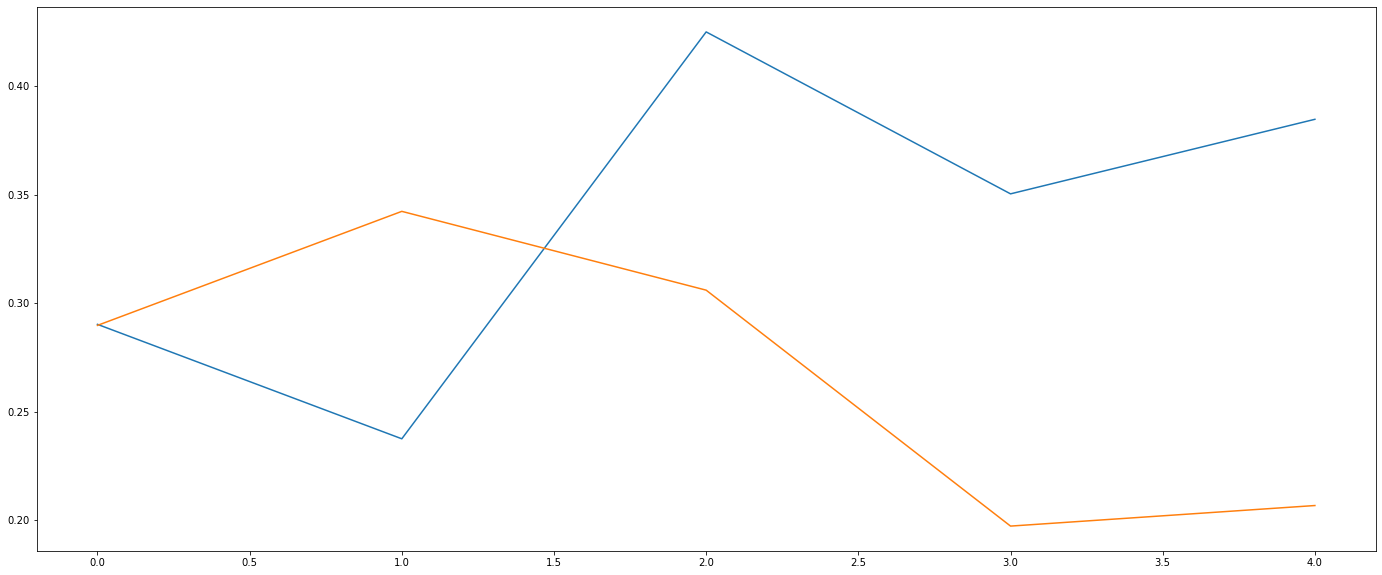

In [112]:
plot_predictions1(model4, X_val, y_val)


1/1 [==============================] - 0s 7ms/step


(   Predictions   Actuals
 0     0.357812  0.144114
 1     0.370470  0.101263
 2     0.371704  0.704330
 3     0.165557  0.237258
 4     0.327410  0.274019
 5     0.348404  0.225079
 6     0.320012  0.170501
 7     0.332972  0.000000
 8     0.122725  0.120659,
 0.04280100577247156)

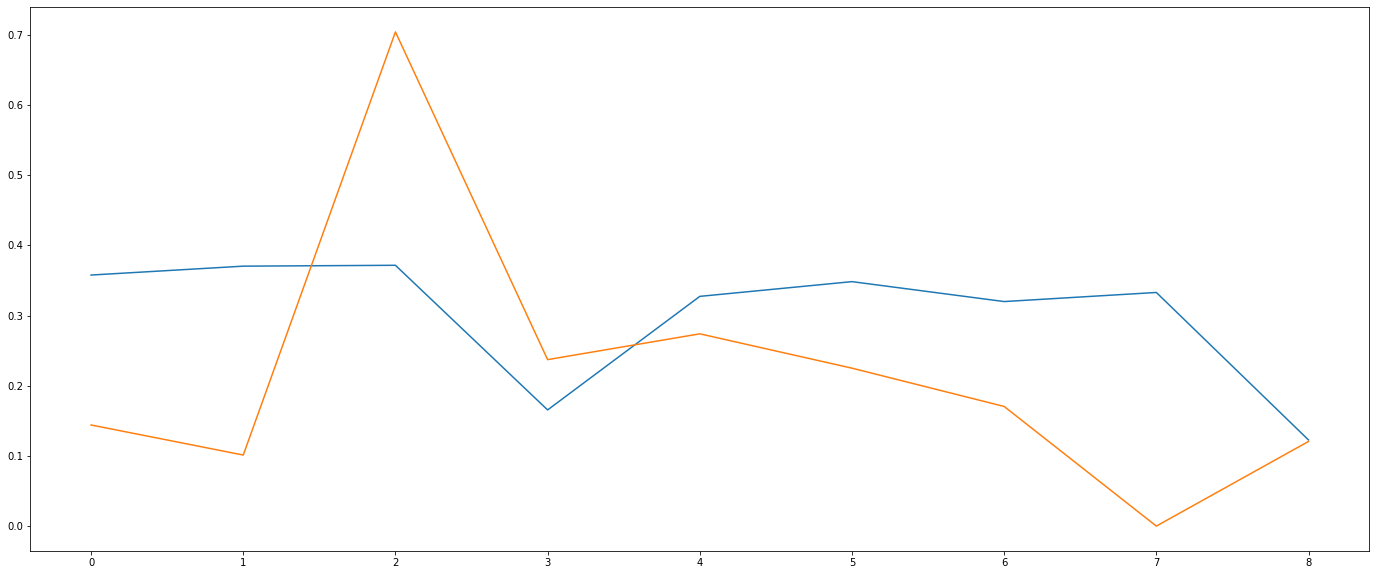

In [113]:
plot_predictions1(model4, X_test, y_test)

In [114]:

# mse, mae for training data
print('MSE: ', mean_squared_error(y_train, train_predictions))
print('MAE: ', mean_absolute_error(y_train, train_predictions))

print('RMSE: ', mean_squared_error(y_train,train_predictions, squared = False))

MSE:  0.02019106870611546
MAE:  0.09904853312763276
RMSE:  0.14209528037945335


In [115]:
# mse, mae for testing data
print('MSE: ', mean_squared_error(y_test, test_predictions))
print('MAE: ', mean_absolute_error(y_test, test_predictions))
print('RMSE: ', mean_squared_error(y_test,test_predictions, squared = False))

MSE:  0.04280100577247156
MAE:  0.17205547993612585
RMSE:  0.2068840394338615


In [116]:
# mse, mae for validation data
print('MSE: ', mean_squared_error(y_val, val_predictions))
print('MAE: ', mean_absolute_error(y_val, val_predictions))
print('RMSE: ', mean_squared_error(y_val,val_predictions, squared = False))

MSE:  0.01604893734891382
MAE:  0.11106302382094295
RMSE:  0.12668440057447414


In [36]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [37]:
MAPE(y_test,test_predictions)

C:\Users\dayan\AppData\Local\Temp/ipykernel_20352/3631455597.py:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100


inf